In [2]:
import pandas as pd  
from datasets import load_dataset
import matplotlib.pyplot    as plt
import ast 
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_da_us = df[(df['job_country'] == 'United States') ]

In [24]:
df_skills = df_da_us.explode('job_skills')
df_skills = df_skills[df_skills['job_skills'].notna()]

In [ ]:
df_skills_count = df_skills.groupby(['job_title_short','job_skills']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values('skill_count',ascending = False)
df_skills_count


,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


In [76]:
df_job_title_count = df_da_us['job_title_short'].value_counts().reset_index(name='jobs_total')

df_skills_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')

df_skills_perc['skills_perc'] = 100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc


,job_title_short,job_skills,skill_count,jobs_total,skills_perc
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


In [43]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

In [79]:
df_skills_count

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


<function matplotlib.pyplot.show(close=None, block=None)>

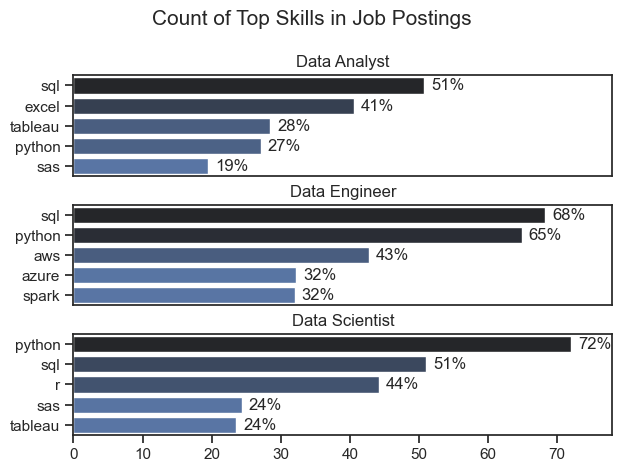

In [97]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) 
    df_plot.plot(kind='barh', x='job_skills',y='skills_perc', ax=ax[i],title =job_title)
    sns.barplot(data=df_plot,x='skills_perc',y='job_skills',ax=ax[i], hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_plot['skills_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    ax[i].legend().set_visible(False)

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Count of Top Skills in Job Postings',fontsize=15)    
fig.tight_layout(h_pad=0.5)
plt.show